In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split , KFold
import pandas as pd
import openpyxl
from model.SimpleLinearRegression import SimpleLinearRegression

model = SimpleLinearRegression()

df = pd.read_excel('/Users/chawkibhd/Desktop/propremodel/Prix-Moyen-Au-m²-Algerie.xlsx')
X = df[['Superficie']].values 
y = df['Prix '].values
#bias
X = np.hstack((np.ones((X.shape[0], 1)), X))
#entraînement=70% && test=30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

In [80]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i % 100 == 0: 
            print(f"Iteration {i}: Cost {cost}")
    return theta, cost_history 

In [81]:
# Initialisation de theta
theta = np.zeros(X_train.shape[1])
alpha = 0.001  #learning rate
num_iters = 1000  #Nombre d'itérations
# Apprentissage des paramètres theta
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)
print("Learned parameters: j(a,b)", theta)
print("Final cost:", cost_history[-1])

Iteration 0: Cost 721365172247881.2
Iteration 100: Cost 592362696639406.4
Iteration 200: Cost 486433801106271.8
Iteration 300: Cost 399450784367306.1
Iteration 400: Cost 328024495619701.0
Iteration 500: Cost 269372164472670.9
Iteration 600: Cost 221208888412487.4
Iteration 700: Cost 181658542426865.72
Iteration 800: Cost 149180633823085.06
Iteration 900: Cost 122510247848267.95
Learned parameters: j(a,b) [22135157.40032051  9296770.25152001]
Final cost: 100807086749783.05


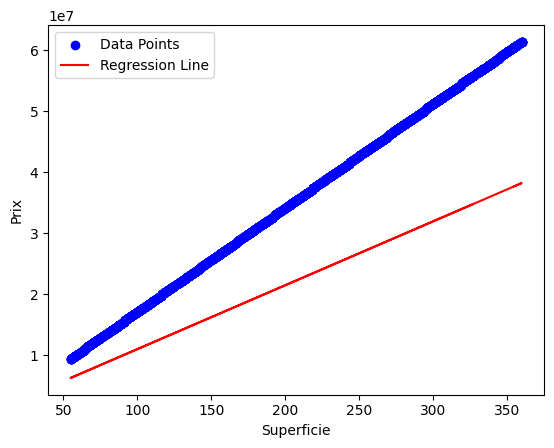

In [ ]:
predictions = X.dot(theta)
# Tracer les points de données et la ligne de régression
plt.scatter(X[:, 1], y, color='blue', label='Data Points')
plt.plot(X[:, 1], predictions, color='red', label='Regression Line')
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()